In [27]:
#load data
import pandas as pd
import numpy as np 


In [28]:
df= pd.read_csv('data/measurements.csv')
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [29]:
#see excel file for data dictionary
file_path = 'data/measurements2.xlsx'
data = pd.read_excel(file_path)
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


we have similar files . so we will utilize df for our analysis now

In [30]:
df.shape

(388, 12)

let´s see the various data properties from column names , null values, etc

In [31]:
df.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill liters',
       'refill gas'],
      dtype='object')

In [32]:
#replace spaces with underscores and lowercase labels
df.columns= df.columns.str.replace(' ','_').str.lower()

In [33]:
df.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'ac', 'rain', 'sun', 'refill_liters',
       'refill_gas'],
      dtype='object')

now we will explore the data types of each columns 

In [34]:
df.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
ac                int64
rain              int64
sun               int64
refill_liters    object
refill_gas       object
dtype: object

In [35]:
#see values of specials
df.specials.unique()

array([nan, 'AC rain', 'AC', 'rain', 'snow', 'AC snow',
       'half rain half sun', 'sun', 'AC sun', 'sun ac', 'ac', 'AC Sun',
       'ac rain'], dtype=object)

In [36]:
df.refill_liters.unique()

array(['45', nan, '37,6', '37,7', '38', '38,3', '10', '39', '41', '37',
       '37,2'], dtype=object)

we will get a list of unique values of objects to see which we will change to numerical

In [37]:
def see_unique_values(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            print(col, df[col].unique())

In [38]:
see_unique_values(df)

distance ['28' '12' '11,2' '12,9' '18,5' '8,3' '7,8' '12,3' '4,9' '11,9' '12,4'
 '11,8' '24,7' '17,3' '33,4' '25,9' '25,3' '14,2' '17,9' '18,4' '18,3'
 '32,6' '19' '12,1' '20' '4,5' '11,7' '10,2' '5,4' '2' '16' '27,3' '10,6'
 '11,6' '13,1' '6,1' '153,5' '2,9' '2,1' '9,8' '6,8' '14' '13,9' '9,7'
 '24,8' '34,8' '5,2' '10,5' '13,2' '13' '12,2' '12,5' '15,7' '6,4' '5,3'
 '26,2' '18,8' '22,9' '162,7' '16,6' '15,9' '5,1' '22,4' '31,1' '16,1'
 '4,2' '17,4' '23,5' '7' '20,1' '20,8' '1,7' '35,9' '36,9' '16,8' '9,9'
 '36,6' '44,9' '21,6' '39,4' '26,6' '53,2' '18,9' '43,5' '16,4' '21,1'
 '22,7' '44,4' '35,8' '40,6' '14,1' '58,7' '16,2' '31,8' '51,6' '38,6'
 '81,2' '130,3' '67,2' '43,7' '56,1' '39' '38,5' '28,2' '19,6' '22,2'
 '13,6' '12,6' '8,7' '7,9' '2,4' '18,1' '1,3' '13,4' '12,8' '29' '31,4'
 '27,1' '25,2' '14,3' '16,9' '9,2' '31,5' '24,9' '17' '7,4' '25,7' '24,5'
 '4,1' '15,4' '101,9' '93,9' '32,1' '48,6' '37,2' '28,8' '6,7' '6,6'
 '13,3' '12,7' '16,5' '20,6' '16,3' '18,7' '36,5' '29,9' '10,

Only gas type,specials and refill_gas looks like objects , the rest looks like data was entered as a string rather than being numerical. 
we will convert them to numericals

In [39]:
def convert_obj_to_num(df):
    for column in df.columns:
        if column not in ['gas_type','specials','refill_gas'] and df[column].dtype == 'object':
            df[column] = pd.to_numeric(df[column], errors='coerce')

In [40]:
convert_obj_to_num(df)

In [41]:
df.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
ac                 int64
rain               int64
sun                int64
refill_liters    float64
refill_gas        object
dtype: object

Now we will have to handle the missing values

In [42]:
def find_nan (df):
    nan_columns = df.columns[df.isna().any()].tolist()
    return nan_columns

In [43]:
nan_cols = find_nan(df)

nan_cols

['distance',
 'consume',
 'temp_inside',
 'specials',
 'refill_liters',
 'refill_gas']

we will check the amount of nan columns and determine how we  can handle it

In [44]:
def nan_perc (df):
    nan_perc = df.isna().sum()/len(df)*100
    return nan_perc

In [45]:
nan_perc(df)

distance         86.597938
consume          87.371134
speed             0.000000
temp_inside      56.443299
temp_outside      0.000000
specials         76.030928
gas_type          0.000000
ac                0.000000
rain              0.000000
sun               0.000000
refill_liters    97.938144
refill_gas       96.649485
dtype: float64

we have a decision to make regarding what columns to keep or drop and eventually use mode to replace some values. we don´t have the luxury to drop rows because in other rows there are important infos, but some columsn will be dropped

In [46]:
df['specials'].unique()

array([nan, 'AC rain', 'AC', 'rain', 'snow', 'AC snow',
       'half rain half sun', 'sun', 'AC sun', 'sun ac', 'ac', 'AC Sun',
       'ac rain'], dtype=object)

let´s deal with the markdown columns

In [47]:
#let´s deal with the specials column
df['specials'].value_counts()

specials
rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC snow                1
half rain half sun     1
AC sun                 1
AC Sun                 1
ac rain                1
Name: count, dtype: int64

In [48]:
#check number of nan
df['specials'].isna().sum()

295

In [49]:
df.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'ac', 'rain', 'sun', 'refill_liters',
       'refill_gas'],
      dtype='object')

In [50]:
nan_perc(df)

distance         86.597938
consume          87.371134
speed             0.000000
temp_inside      56.443299
temp_outside      0.000000
specials         76.030928
gas_type          0.000000
ac                0.000000
rain              0.000000
sun               0.000000
refill_liters    97.938144
refill_gas       96.649485
dtype: float64

In [51]:
df.isna().sum()

distance         336
consume          339
speed              0
temp_inside      219
temp_outside       0
specials         295
gas_type           0
ac                 0
rain               0
sun                0
refill_liters    380
refill_gas       375
dtype: int64

In [54]:
data.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [55]:
data.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters    float64
refill gas        object
dtype: object

In [56]:
#check shapes
display(df.shape)
display(data.shape)

(388, 12)

(388, 12)

The excel sheet seems to have similar shape with less missing values. so we will use the excel data for our analysis 

In [57]:
#drop columns with over 70% of nan
nan_perc(data)

distance          0.000000
consume           0.000000
speed             0.000000
temp_inside       3.092784
temp_outside      0.000000
specials         76.030928
gas_type          0.000000
AC                0.000000
rain              0.000000
sun               0.000000
refill liters    96.649485
refill gas       96.649485
dtype: float64

let´s see what they have as values

In [58]:
data['specials'].unique()

array([nan, 'AC rain', 'AC', 'rain', 'snow', 'AC snow',
       'half rain half sun', 'sun', 'AC sun', 'sun ac', 'ac', 'AC Sun',
       'ac rain'], dtype=object)

In [60]:
data['refill liters'].unique()

array([45. ,  nan, 37.6, 37.7, 38. , 38.3, 10. , 39. , 41. , 37. , 37.2])

In [61]:
data['refill gas'].unique()

array(['E10', nan, 'SP98'], dtype=object)

In [64]:
#drop specials, refill liters and refill gas
data = data.drop(columns=['specials','refill liters','refill gas'])

In [65]:
data.isna().sum()

distance         0
consume          0
speed            0
temp_inside     12
temp_outside     0
gas_type         0
AC               0
rain             0
sun              0
dtype: int64

Handling temperature inside , since it´s a numerical variable. we will replace with mean

In [66]:
#replace nan in temp_inside with mean
data['temp_inside'].fillna(data['temp_inside'].mean(), inplace=True)

In [67]:
#check success
data.isna().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
AC              0
rain            0
sun             0
dtype: int64

let´s describe the data

In [69]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
distance,388.0,19.652835,22.667837,1.3,11.80,14.6,19.0,216.1
consume,388.0,4.912371,1.033172,3.3,4.30,4.7,5.3,12.2
speed,388.0,41.927835,13.598524,14.0,32.75,40.5,50.0,90.0
temp_inside,388.0,21.929521,0.994666,19.0,21.50,22.0,22.5,25.5
temp_outside,388.0,11.358247,6.991542,-5.0,7.00,10.0,16.0,31.0
AC,388.0,0.077320,0.267443,0.0,0.00,0.0,0.0,1.0
rain,388.0,0.123711,0.329677,0.0,0.00,0.0,0.0,1.0
sun,388.0,0.082474,0.275441,0.0,0.00,0.0,0.0,1.0


In [70]:
#visulaize with seaborn
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='temp_outside', ylabel='Count'>

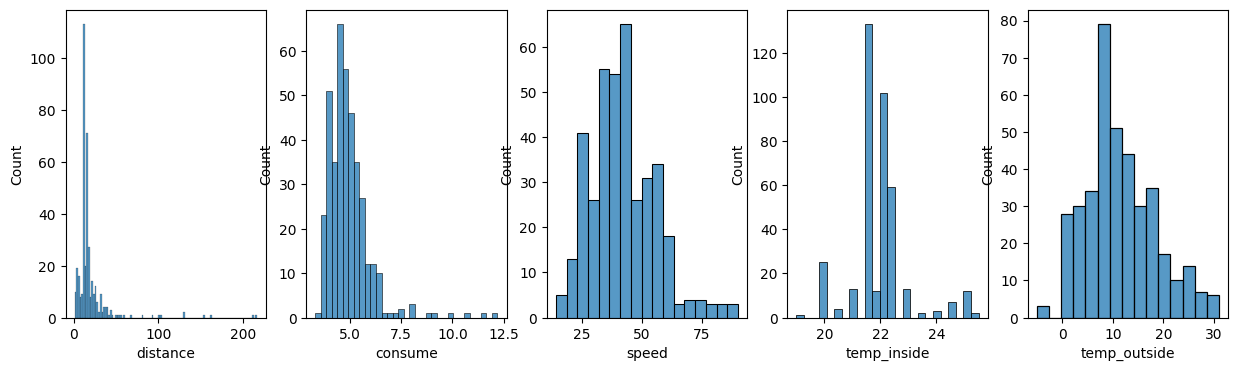

In [72]:
#see distribution of distance , consume, speed, temp_inside, temp_outside
fig, axes = plt.subplots(1, 5, figsize=(15, 4))
sns.histplot(data['distance'],ax=axes[0])
sns.histplot(data['consume'],ax=axes[1])
sns.histplot(data['speed'],ax=axes[2])
sns.histplot(data['temp_inside'],ax=axes[3])
sns.histplot(data['temp_outside'],ax=axes[4])

explore categorical datas

In [80]:

data2 = data.copy()
data2['rain'] = data2['rain'].astype(str)
data2['sun'] = data2['sun'].astype(str)
data2['AC'] = data2['AC'].astype(str)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23160\3620233496.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data2["gas_type"], ax=axes[0], palette=colors)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23160\3620233496.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data2["AC"], ax=axes[1], palette=colors)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23160\3620233496.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data2["rain"], ax=axes[2], palette=colors)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23160\3620233496.py:7: Future

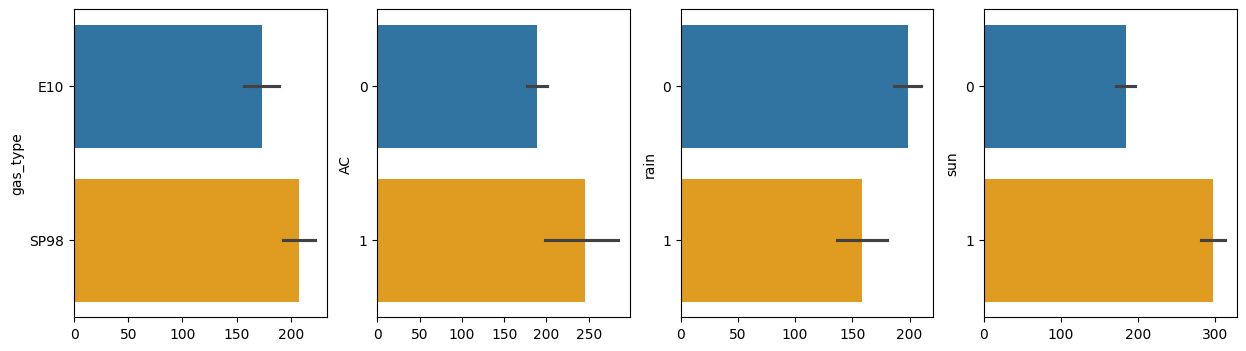

In [85]:
# barplot of gas type , AC, rain, sun
fig, axes = plt.subplots(1, 4, figsize=(15, 4))
colors = ["#1f77b4", "#ffa500"]
sns.barplot(data2["gas_type"], ax=axes[0], palette=colors)
sns.barplot(data2["AC"], ax=axes[1], palette=colors)
sns.barplot(data2["rain"], ax=axes[2], palette=colors)
sns.barplot(data2["sun"], ax=axes[3], palette=colors)
plt.show()

## Exploring our data

Our target column will be the gas consumption (consume). we will first attempt to test theories that gas types have a significant effect on consumption, but we are also aware that the presence of other factors like AC, temperature and speed also affect consumption


First Hypothesis, we are concerned by fuel efficiency and gas type. we will test a hypothesis that states that gas type affects the fuel efficiency while introducing a third option of havin AC on or off

 Ho is
H0 : µ1=µ2
H1/𝛼 : µ1≠µ2
with µ1 as fuel efficiency of gas 1 and u2 fuel effficiency of gas 2

In [88]:
from scipy.stats import f_oneway

In [89]:
#create a pivot table to see the mean of consume for each gas type
pivot_table1 = data.pivot_table(values='consume', index='gas_type', aggfunc=np.mean)
pivot_table1

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23160\3707375907.py:2: FutureWarning: The provided callable <function mean at 0x00000194D0D10FE0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table1 = data.pivot_table(values='consume', index='gas_type', aggfunc=np.mean)


,consume
gas_type,
E10,4.931250
SP98,4.899123


In [103]:
#create a new column called 'consume_rate' to see consume by distance
data2['efficiency'] = data2['consume']/data2['distance']

In [105]:
data2.drop(columns=['consume_rate'], inplace=True)

In [106]:
data2.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,efficiency
0,28.0,5.0,26,21.5,12,E10,0,0,0,0.178571
1,12.0,4.2,30,21.5,13,E10,0,0,0,0.350000
2,11.2,5.5,38,21.5,15,E10,0,0,0,0.491071
3,12.9,3.9,36,21.5,14,E10,0,0,0,0.302326
4,18.5,4.5,46,21.5,15,E10,0,0,0,0.243243


we will do it too for data dataframe because it will useful later


In [138]:
data['efficiency'] = data['consume']/data['distance']

#try with grouped

In [110]:
efficiency_grouped = data2.groupby(['gas_type', 'AC'])['efficiency'].mean()


In [111]:
efficiency_grouped

gas_type  AC
E10       0     0.437110
          1     0.413013
SP98      0     0.487489
          1     0.672335
Name: efficiency, dtype: float64

In [112]:
#create a dataframe with the mean of efficiency by gas type and AC with columns gas_type, AC, efficiency
efficiency_grouped = pd.DataFrame(efficiency_grouped).reset_index()


In [113]:
efficiency_grouped

,gas_type,AC,efficiency
0,E10,0,0.437110
1,E10,1,0.413013
2,SP98,0,0.487489
3,SP98,1,0.672335


In [114]:
from statsmodels.formula.api import ols 
from statsmodels.stats.anova import anova_lm

In [115]:
model= ols('efficiency ~ gas_type + AC', data=efficiency_grouped).fit()

In [116]:
#see the anova table
anova_table = anova_lm(model)
display(anova_table)

,df,sum_sq,mean_sq,F,PR(>F)
gas_type,1.0,0.023979,0.023979,2.197002,0.377844
AC,1.0,0.006460,0.006460,0.591884,0.582528
Residual,1.0,0.010914,0.010914,NaN,NaN


A clear interpretation of the anova test
For gas types, It is indicative that the p-value(0.377844) is greater than the significance interval (0.05), meaning we will retain the null hypothesis and accept that there is no signficant difference in the efficiency of both gas types

For 'AC': The p-value of 0.582528 is greater than the significance level, suggesting that we will retain the null hypothesis. There is no significant difference in efficiency between vehicles with and without the air conditioning on.
,

In [127]:
efficiency_e10_ac0 = data2.loc[(data2["gas_type"] == "E10") & (data2["AC"] == '0'), "efficiency"]
efficiency_e10_ac1 = data2.loc[(data2["gas_type"] == "E10") & (data2["AC"] == '1'), "efficiency"]
efficiency_sp98_ac0 = data2.loc[(data2["gas_type"] == "SP98") & (data2["AC"] == '0'), "efficiency"]
efficiency_sp98_ac1 = data2.loc[(data2["gas_type"] == "SP98") & (data2["AC"] == '1'), "efficiency"]



In [128]:
from scipy.stats import f_oneway

In [129]:

f_stat, p_value = f_oneway(efficiency_e10_ac0, efficiency_e10_ac1, efficiency_sp98_ac0, efficiency_sp98_ac1)



In [130]:
print("F-statistic:", f_stat)
print("P-value:", p_value)

F-statistic: 0.6561873572788793
P-value: 0.5794753950343954


In [134]:
# Check significance level ( alpha = 0.05)
alpha = 0.05
if p_value < alpha:
    print(
        "There is a significant difference in efficiency between groups of gas types SP98 or E10 with ac on or off."
    )
else:
    print(
        "No significant difference in efficiency between groups of gas types  SP98 or E10  with ac on or off."
    )

No significant difference in efficiency between groups of gas types  SP98 or E10  with ac on or off.


## fitting our model
No we will try to fit in a linear model to predict our efficiency column. we will use linear regression

In [149]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,consume_rate,efficiency
0,28.0,5.0,26,21.5,12,E10,0,0,0,0.178571,0.178571
1,12.0,4.2,30,21.5,13,E10,0,0,0,0.350000,0.350000
2,11.2,5.5,38,21.5,15,E10,0,0,0,0.491071,0.491071
3,12.9,3.9,36,21.5,14,E10,0,0,0,0.302326,0.302326
4,18.5,4.5,46,21.5,15,E10,0,0,0,0.243243,0.243243


In [150]:
#encode gas type
data['gas_type'] = data['gas_type'].map({'E10':0, 'SP98':1})

using data2 pd dataframe, where we converted numericals to categorical for gas type, AC, rain, sun, we will use them to split the data into numerical and categorical . so we can seperately work on the numerical columns and the categorical columns

In [156]:
data3 = data2.copy()
data_num= data3.select_dtypes(include=['float64','int64'])


In [154]:
X= data.drop(columns=['efficiency'], axis=1)
y= data['efficiency']

In [157]:
corr_matrix = data_num.corr()
display(corr_matrix)

,distance,consume,speed,temp_inside,temp_outside,efficiency
distance,1.000000,-0.128967,0.562299,0.075178,0.088175,-0.256357
consume,-0.128967,1.000000,-0.227866,-0.160623,-0.320811,0.779053
speed,0.562299,-0.227866,1.000000,0.059293,0.015411,-0.355459
temp_inside,0.075178,-0.160623,0.059293,1.000000,0.359500,-0.122780
temp_outside,0.088175,-0.320811,0.015411,0.359500,1.000000,-0.080493
efficiency,-0.256357,0.779053,-0.355459,-0.122780,-0.080493,1.000000


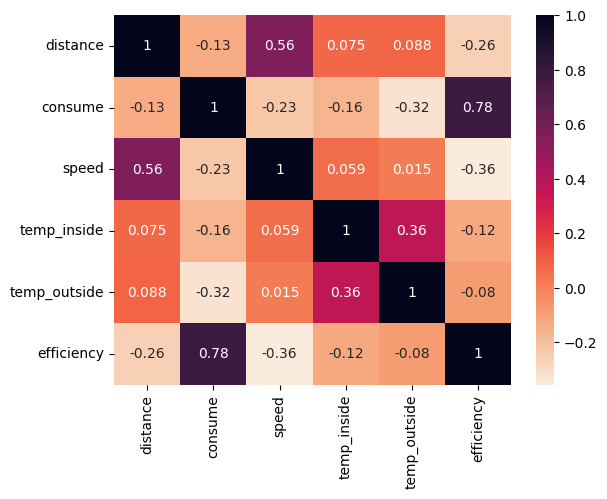

In [158]:
# let´s check for multicolinearity
cmap = sns.color_palette("rocket_r", as_cmap=True)
sns.heatmap(corr_matrix, annot=True, cmap=cmap)
plt.show()

Our first model will target effciency. so we will drop consume , since efficiency was obtained by dividing consume volume by distance . 
in another model we will use consume as our target variable  , and exclude efficiency